# <center>Introduction on Using Python to access and analyse GeoNet's Tide Gauge Data

## Table of Contents

### 1. Introduction
### 2. Set up
### 3. Get the Location of all  Stations with Tide Gauge
### 4. Look more at one Station
### 5. Get Waveform Data
#####  &nbsp; 5. 1 Getting Near real-time waveform data
### 6. Save Waveform Data

## 1. Introduction

In this tutorial we will be learning how to use Python to be able to access the data recorded by GeoNets network of water level sensors’. Then we will look at some ways we can interact with this data in Python. 

You will need to install the packages obspy (https://github.com/obspy/obspy/wiki) and basemap (https://matplotlib.org/basemap/) useing `pip install (package name)` in the terminal / command prompt

This tutorial assumes that you have basic knowledge of Python.
We will be using a package called obspy (https://github.com/obspy/obspy/wiki)

###### About Geonet tide gauge data

Geonet has 3 types of data from tide gauges.
<ul>
<li>Then raw data of the pressure sensor
<li>The data corrected to height
<li>The data that has been de-tided 


Geonet also samples at 2 rates. 10 Hz and 1 Hz. The 3 letter channel code tells you all of this.
All tide gauges are in the form (B/L)T(Z/H/T)
<ul>
<li>The first letter is the sample rate. B = 10 Hz and L = 1 Hz, <br>
<li>The second letter say that is a water level sensor<br> 
<li>The third letter say what kind of data it is, Z = raw, H = corrected to height and T = de-tided data <br>

For a full list see https://www.geonet.org.nz/data/supplementary/channels 

## 2. Set Up

###### Import obspy

In [2]:
from obspy.clients.fdsn import Client as FDSNClient # Import a module to retrieve data from FDSN Web Services 
from obspy import UTCDateTime # Import a module to manage time series format and rename as UTCDateTime
from obspy import read_inventory # Imports module to read stattion data

For more information on obspy run `help(obspy)`

In [3]:
#import matplotlib
#matplotlib.use('TkAgg')

`matplotlib` is the package used to make plots in python. 
The line `matplotlib.use('TkAgg')` will make all plots open in an interactive window, known as a Tkinter window, so you can zoom in on plots and save them as a png. (The `Tk` is to make it in a Tkinter window and the `Agg` stands for the Anti-Grain Geometry rendering engine that is used to make high-quality images). 
This is a needed line of code in Python 2 to stop plotting errors but is not need in Python 3.

###### Set up URL's

In [4]:
client = FDSNClient("GEONET")
clinet_nrt = FDSNClient('https://service-nrt.geonet.org.nz')

GeoNet has two FDSN services <br>
For waveform data
an archive service holds verified data starting 7 days after collection, 
and a near real-time service holds data that could be incomplete from the last 8 days<br>

## 3. Get the Location of all  Stations with Tide Gauges

###### Set the start and end time of the data you want to select

In [5]:
starttime = UTCDateTime("2011-03-11T17:00:00.000") # initial time
endtime = UTCDateTime("2011-03-12T07:00:00.000") # end time 

Note that time must be in UTC (Universal Time Coordinated) which is 13 or 12 hours behind nzt (New Zealand Time) (depending on daylight savings time).  Also Note that GMT or Greenwich mean time is the same time as UTC.
    In this case we are looking at the 2011 Tōhoku earthquake and tsunami which happened on the 11 March 2011 at 14:46 JST and if it efected new zeeland it would have done so about 12 hours after it happened. 
    There are online converters if needed.
    You can add to the time in number of seconds eg. `stattime + 60` would be the time 2011-03-11 17:01:00.000<br>

###### Get all stations that have a tide gauge

In [6]:
Inventory = client.get_stations(starttime = starttime,endtime = endtime, channel="?T?" )

`get_stations` gets all stations that where running at some point between `starttime` and `endtime` and hold to any other conditions put in the `()`such as channel, station, latitude and longitude with a maxradius<br>
All channels with a code in the form (B/L)T(Z/H/T) are tide gauges <br>
The ?s say it will look for data with a channel code in the format (any letter)T(any letter) <br>
Therefor the code above finds all stations which have a channel code in the format (any letter)T(any letter)<br> 

###### Plot all stations that have a tide gauge

In [ ]:
Inventory.plot(projection="local")

`projection="local"` makes a plot that is a map and has all the data points in it. More information can be found at https://matplotlib.org/basemap/

## 4. Look more at one Station

In this section we will learn how to get more information on a station including the instrument response information.

###### Get more data on the Raoul Island station

In [8]:
Raoul_Island = client.get_stations(starttime = starttime,endtime = endtime,station="RFRT", level="response" )

Having seen the Raoul Island station on the map and its station code, I can get more data about this station. <br>
We can use the parameter `level` to pick the "level" of detail in data we want. The “level” of the data is about how much on each station you get. `level="response"` is the  most complete "level" of data we can get from `get_stations` and includes the instrument response data.<br>
`station="RFRT"` say that the code get data for the station with the station code RBCT<br>

###### Print Raoul Island station metadata

In [9]:
channels = Raoul_Island [0][0]
print(channels)

Station RFRT (Raoul Island Fishing Rock)
	Station Code: RFRT
	Channel Count: 16/16 (Selected/Total)
	2009-05-18T00:00:00.000000Z - 
	Access: open 
	Latitude: -29.25, Longitude: -177.90, Elevation: 2.0 m
	Available Channels:
		RFRT.40.BTZ, RFRT.40.BTH, RFRT.40.BTT, RFRT.40.LTZ, RFRT.40.LTH, 
		RFRT.40.LTT, RFRT.40.VTH, RFRT.40.VTT, RFRT.41.BTZ, RFRT.41.BTH, 
		RFRT.41.BTT, RFRT.41.LTZ, RFRT.41.LTH, RFRT.41.LTT, RFRT.41.VTH, 
		RFRT.41.VTT


Remember the 3 letter channel code.
All tide gauges are in the form (B/L)T(Z/H/T)
<ul>
<li>The first letter is the sample rate. B = 10 Hz and L = 1 Hz, <br>
<li>The second letter say that is a water level sensor<br> 
<li>The third letter say what kind of data it is, Z = raw, H = corrected to height and T = de-tided data <br>
</ul>
Note that `Raoul_Island [0][0]` says get the first network's first station.

###### Print Raoul Island Channel metadata including instrument response data for channels at 10Hz

In [10]:
for i in range (len(channels)): # make a lop over the channels data
        if i==1 or i==4 or i==7 : # only print the 3 channel we want to look more into
            print(channels[i])
            print(channels[i].response)
            print("")

Channel 'BTZ', Location '40' 
	Time range: 2011-11-09T00:00:00.000000Z - --
	Latitude: -29.25, Longitude: -177.90, Elevation: 2.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 10.00 Hz
	Sensor (Description): Pressure Sensor (Druck PTX)
	Response information available
Channel Response
	From m () to count ()
	Overall Sensitivity: 86402.7 defined at 1.000 Hz
	5 stages:
		Stage 1: PolynomialResponseStage from m to A, gain: 0.0008
		Stage 2: PolynomialResponseStage from A to V, gain: 250
		Stage 3: PolynomialResponseStage from V to V, gain: 1.03
		Stage 4: CoefficientsTypeResponseStage from V to count, gain: 419430
		Stage 5: FIRResponseStage from count to count, gain: 1

Channel 'BTT', Location '40' 
	Time range: 2011-11-09T00:00:00.000000Z - --
	Latitude: -29.25, Longitude: -177.90, Elevation: 2.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00

Note that the 2nd, 5th and 8th channels are printed as the have the channel code in the form BT(Z/H/T)<br> 
In other words we know these 3 channels are tide gauges that have a sample rate of 10Hz.<br>

## 5. Get Waveform Data

###### Get Waveform Data from 10Hz Channels

In [11]:
RFRT= client.get_waveforms('NZ',"RFRT", "40", "BT?", starttime,endtime)

The parameters are in the order network, station, location, channel, starttime, and endtime.
The ? is a wildcard character for only a single character, so we will get data with channel codes BTH, BTT and BTZ

###### Check basic metadata from miniSEED header

In [12]:
print(RFRT[0].stats)

               network: NZ
               station: RFRT
              location: 40
               channel: BTH
             starttime: 2011-03-11T16:59:54.269536Z
               endtime: 2011-03-12T07:00:16.369536Z
         sampling_rate: 10.0
                 delta: 0.1
                  npts: 504222
                 calib: 1.0
_fdsnws_dataselect_url: http://service.geonet.org.nz/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 2331, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 3580416})


###### Plot this data

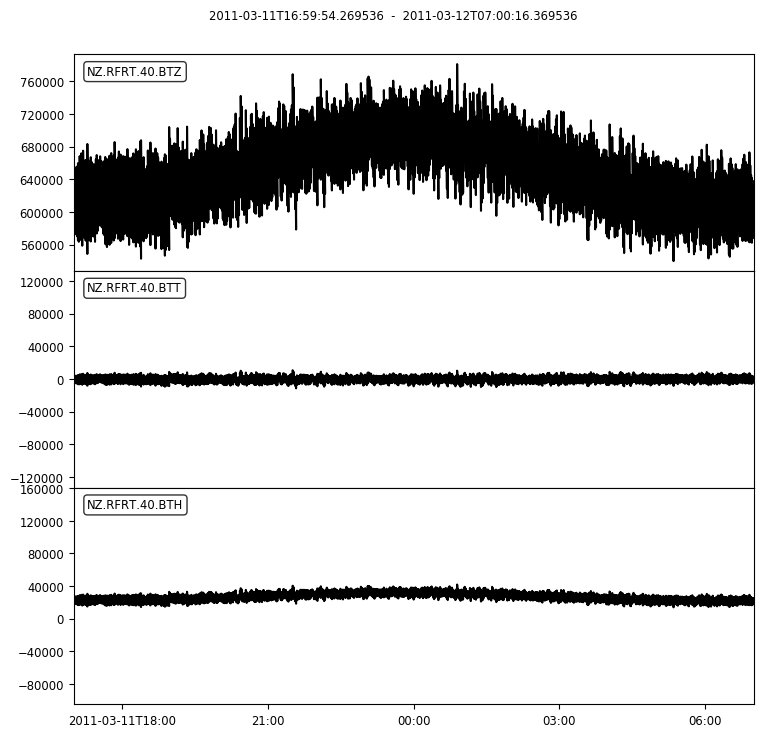

In [13]:
RFRT.plot()

Note the differences in the 3 plots and remember the 3rd letter say what kind of data it is, Z = raw, H = corrected to height and T = de-tided data.<br>
This can be seen clearly when plotted

###### Print what channels we have saved under RFRT

In [14]:
print(RFRT)

3 Trace(s) in Stream:
NZ.RFRT.40.BTH | 2011-03-11T16:59:54.269536Z - 2011-03-12T07:00:16.369536Z | 10.0 Hz, 504222 samples
NZ.RFRT.40.BTT | 2011-03-11T16:59:54.269536Z - 2011-03-12T07:00:16.369536Z | 10.0 Hz, 504222 samples
NZ.RFRT.40.BTZ | 2011-03-11T16:59:54.269536Z - 2011-03-12T07:00:16.369536Z | 10.0 Hz, 504222 samples


Data is in order BTH,BTT,BTZ so is in order data corrected to height, de-tided, then raw data.

###### Split the RFRT data up into its channels

In [15]:
corrected = RFRT[0]
detided = RFRT[1]
raw = RFRT[2]

## 5. 1 Getting Near real-time waveform data

###### Set new start and end time of the data you want to look at

In [16]:
t1 = UTCDateTime.now()-777600 #9 days ago
t2 = UTCDateTime.now()-518400 #6 days ago

Note that time must be in UTC (Universal Time Coordinated) which is 13 or 12 hours behind nzt (New Zealand Time) (depending on daylight savings time).
There are online converters if needed.
`UTCDateTime.now()-777600` say take the time the computer says it is now, convert it to UTC and then takes away 777,600 seconds from it, which is $60$(minutes)$*60$(seconds)$*24$(hours)$*9$(days). 

###### Try both near real-time and  archive service to get waveform data

In [17]:
try:
    stnrt = clinet_nrt.get_waveforms('NZ',"RFRT", "40", "BTH", t1 , t2)#try near real-time
except:
    print('nrt client not successful')
    
try:
    starc = client.get_waveforms('NZ',"RFRT", "40", "BTH", t1 , t2)#try achive
except:
    print('arc client not successful')

Remember that GeoNet has two FDSN services <br>
An archive service holds verified data starting 7 days after collection<br>
A near real-time service holds data that could be incomplete from the last 8 days<br>
As The time between 9 and 6 days overlaps this time the code tries to get the data from both services<br>


###### Merge this data

In [18]:
st = stnrt #rename near real-time data 
st += starc #add archive data to this 
st.merge(fill_value = 'interpolate') #merge this data

1 Trace(s) in Stream:
NZ.RFRT.40.BTH | 2018-12-09T22:48:21.669500Z - 2018-12-12T22:48:46.969500Z | 10.0 Hz, 2592254 samples

If data is not merged then it is harder to plot and manipulate. 
`st += starc` is the same as `st = st + starc`. 
`fill_value = 'interpolate'` says that if there is a missing value then it will be filled with a "best guess" data point by looking at the two data points next to it. 

###### Plot this data

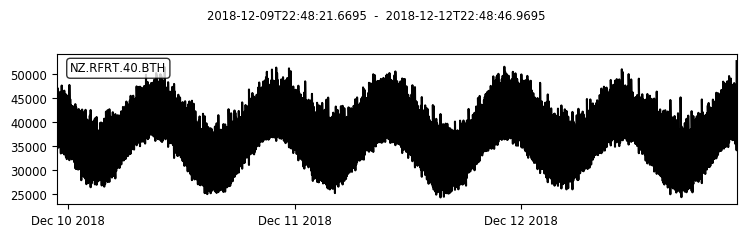

In [19]:
st.plot()

###### Trim this data

In [20]:
t = UTCDateTime.now()-604800 #7 days ago
st.trim(t,t+86400)

1 Trace(s) in Stream:
NZ.RFRT.40.BTH | 2018-12-11T22:48:56.569500Z - 2018-12-12T22:48:46.969500Z | 10.0 Hz, 863905 samples

`st.trim` is used to "zoom in" on part of the data that you already have. <br>
In this example the code is looking at data from 7 days after now till 8 days after now ($60$(minutes)$*60$(seconds)$*24$(hours)$*7$(days)$= 604800$ and $60$(minutes)$*60$(seconds)$*24$(hours)$= 86400$ or 1 day)


###### Plot the trimmed data

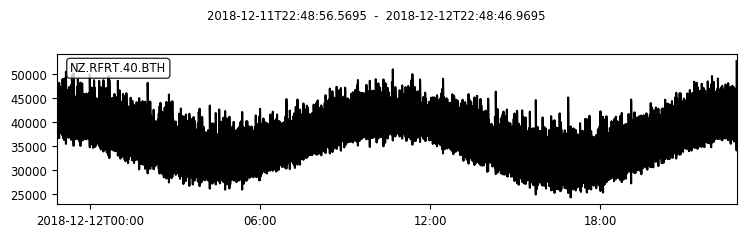

In [21]:
st.plot()

## 6. Save Waveform Data

###### Save this data

In [22]:
corrected.write('corrected.csv', format='TSPAIR')
detided.write('detided.csv', format='TSPAIR')
raw.write('raw.csv', format='TSPAIR')

Files are save into the samed folder that this notebook is in. <br>
Files are saved in .csv format to be able to opened by most spreadsheet soft wear.<br>
`format = 'TSPAIR'` makes the data into a two column list of time and the sample values <br>
For more information on this you can go to http://ds.iris.edu/ds/nodes/dmc/data/formats/simple-ascii/